In [18]:
from pathlib import Path
from Bio.PDB import PDBList, PDBParser
import os
from tqdm import tqdm
import warnings
import pandas as pd
from Bio import SeqIO
from dotenv import load_dotenv
import os
import requests
import time
import json
from Bio.PDB.ic_rebuild import structure_rebuild_test
import numpy as np
import sys
import seaborn as sns

load_dotenv()

True

In [92]:
WINDOW_SIZE = 3
PDBMINE_URL = os.getenv("PDBMINE_URL")
casp_protein_id = 'T1032'
casp_protein_id2 = 'T1032-D1'
pdb_code = '6n64'
alphafold_id = 'T1032TS427_1'

In [5]:
amino_acid_codes = {
    "ALA": "A",
    "ARG": "R",
    "ASN": "N",
    "ASP": "D",
    "CYS": "C",
    "GLN": "Q",
    "GLU": "E",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LEU": "L",
    "LYS": "K",
    "MET": "M",
    "PHE": "F",
    "PRO": "P",
    "SER": "S",
    "THR": "T",
    "TRP": "W",
    "TYR": "Y",
    "VAL": "V"
}

In [9]:
# Get X-ray pdb
pdbl = PDBList()
parser = PDBParser()
xray_fn = pdbl.retrieve_pdb_file(pdb_code, pdir='pdb', file_format='pdb', obsolete=False)
# Get X-ray structure
# xray_url = 'https://predictioncenter.org/download_area/CASP14/targets/casp14.targets.T.public_11.29.2020.tar.gz'
# xray_dir = Path('./casp-xray')
# xray_dir.mkdir(exist_ok=True)
# os.system(f'wget -O {xray_dir}/casp14.targets.T.public_11.29.2020.tar.gz {xray_url}')
# os.system(f'tar -xvf {xray_dir}/casp14.targets.T.public_11.29.2020.tar.gz -C {xray_dir}')
# xray_fn = xray_dir / f'{casp_protein_id}.pdb'
# xray_url = "https://predictioncenter.org/casp14/target.cgi?target=T1024&view=template"
# xray_fn = Path(f'./casp-xray/{casp_protein_id}.pdb')

# Get CASP predictions
predictions_url = f'https://predictioncenter.org/download_area/CASP14/predictions/regular/{casp_protein_id}.tar.gz'
predictions_dir = Path(f'./casp-predictions/')
predictions_dir.mkdir(exist_ok=True)
# os.system(f'wget -O {predictions_dir}/{casp_protein_id}.tar.gz {predictions_url}')
# os.system(f'tar -xvf {predictions_dir}/{casp_protein_id}.tar.gz -C {predictions_dir}')

# Get CASP results
results_url = 'https://predictioncenter.org/download_area/CASP14/results/tables/casp14.res_tables.T.tar.gz'
results_dir = Path('casp-results')
results_dir.mkdir(exist_ok=True)
# os.system(f'wget -O {results_dir / "casp14.res_tables.T.tar.gz"} {results_url}')
# os.system(f'tar -xvf {results_dir / "casp14.res_tables.T.tar.gz"} -C {results_dir}')
results_file = results_dir / f'{casp_protein_id2}.txt'

Structure exists: 'pdb/pdb6n64.ent' 


--2024-04-25 17:15:36--  https://predictioncenter.org/download_area/CASP14/predictions/regular/T1032.tar.gz
Resolving predictioncenter.org (predictioncenter.org)... 128.120.136.155
Connecting to predictioncenter.org (predictioncenter.org)|128.120.136.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23167402 (22M) [application/x-gzip]
Saving to: ‘casp-predictions/T1032.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  360K 63s
    50K .......... .......... .......... .......... ..........  0%  744K 46s
   100K .......... .......... .......... .......... ..........  0% 11.4M 31s
   150K .......... .......... .......... .......... ..........  0% 11.8M 24s
   200K .......... .......... .......... .......... ..........  1%  800K 25s
   250K .......... .......... .......... .......... ..........  1% 12.1M 21s
   300K .......... .......... .......... .......... ..........  1% 11.6M 18s
   350K .......... .......... .......... .......... 

T1032/
T1032/T1032TS277_2
T1032/T1032TS252_3
T1032/T1032TS352_4
T1032/T1032TS317_2
T1032/T1032TS061_5
T1032/T1032TS351_5
T1032/T1032TS066_1
T1032/T1032TS477_5
T1032/T1032TS062_3
T1032/T1032TS009_3
T1032/T1032TS285_4
T1032/T1032TS319_3
T1032/T1032TS491_5
T1032/T1032TS026_3
T1032/T1032TS192_3
T1032/T1032TS437_4
T1032/T1032TS101_5
T1032/T1032TS351_4
T1032/T1032TS187_2
T1032/T1032TS024_2
T1032/T1032TS253_5
T1032/T1032TS052_5
T1032/T1032TS362_2
T1032/T1032TS242_5
T1032/T1032TS349_2
T1032/T1032TS319_2
T1032/T1032TS278_4
T1032/T1032TS097_2
T1032/T1032TS238_1
T1032/T1032TS368_3
T1032/T1032TS063_1
T1032/T1032TS029_3
T1032/T1032TS033_1
T1032/T1032TS352_3
T1032/T1032TS071_4
T1032/T1032TS328_2
T1032/T1032TS050_3
T1032/T1032TS339_5
T1032/T1032TS253_3
T1032/T1032TS335_1
T1032/T1032TS339_3
T1032/T1032TS476_3
T1032/T1032TS187_1
T1032/T1032TS193_1
T1032/T1032TS293_4
T1032/T1032TS220_3
T1032/T1032TS018_1
T1032/T1032TS032_5
T1032/T1032TS013_3
T1032/T1032TS217_2
T1032/T1032TS298_2
T1032/T1032TS460_5
T1032

--2024-04-25 17:15:39--  https://predictioncenter.org/download_area/CASP14/results/tables/casp14.res_tables.T.tar.gz
Resolving predictioncenter.org (predictioncenter.org)... 128.120.136.155
Connecting to predictioncenter.org (predictioncenter.org)|128.120.136.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5111789 (4.9M) [application/x-gzip]
Saving to: ‘casp-results/casp14.res_tables.T.tar.gz’

     0K .......... .......... .......... .......... ..........  1%  155K 32s
    50K .......... .......... .......... .......... ..........  2%  374K 22s
   100K .......... .......... .......... .......... ..........  3%  379K 19s
   150K .......... .......... .......... .......... ..........  4% 10.9M 14s
   200K .......... .......... .......... .......... ..........  5%  361K 14s
   250K .......... .......... .......... .......... ..........  6%  346K 14s
   300K .......... .......... .......... .......... ..........  7% 1.12M 12s
   350K .......... .......... ...

T1024-D1.txt
T1024-D2.txt
T1024.txt
T1025-D1.txt
T1026-D1.txt
T1027-D1.txt
T1028-D1.txt
T1029-D1.txt
T1030-D1.txt
T1030-D2.txt
T1030.txt
T1031-D1.txt
T1032-D1.txt
T1033-D1.txt
T1034-D1.txt
T1035-D1.txt
T1036s1-D1.txt
T1037-D1.txt
T1038-D1.txt
T1038-D2.txt
T1038.txt
T1039-D1.txt
T1040-D1.txt
T1041-D1.txt
T1042-D1.txt
T1043-D1.txt
T1045s1-D1.txt
T1045s2-D1.txt
T1046s1-D1.txt
T1046s2-D1.txt
T1047s1-D1.txt
T1047s2-D1.txt
T1047s2-D2.txt
T1047s2-D3.txt
T1047s2.txt
T1049-D1.txt
T1050-D1.txt
T1050-D2.txt
T1050-D3.txt
T1050.txt
T1052-D1.txt
T1052-D2.txt
T1052-D3.txt
T1052.txt
T1053-D1.txt
T1053-D2.txt
T1053.txt
T1054-D1.txt
T1054.txt
T1055-D1.txt
T1056-D1.txt
T1057-D1.txt
T1058-D1.txt
T1058-D2.txt
T1058.txt
T1060s2-D1.txt
T1060s3-D1.txt
T1061-D1.txt
T1061-D2.txt
T1061-D3.txt
T1061.txt
T1064-D1.txt
T1065s1-D1.txt
T1065s2-D1.txt
T1067-D1.txt
T1068-D1.txt
T1070-D1.txt
T1070-D2.txt
T1070-D3.txt
T1070-D4.txt
T1070.txt
T1073-D1.txt
T1074-D1.txt
T1076-D1.txt
T1078-D1.txt
T1079-D1.txt
T1080-D1.txt
T108

 .......... .......... .......... 95%  547K 0s
  4750K .......... .......... .......... .......... .......... 96% 4.51M 0s
  4800K .......... .......... .......... .......... .......... 97% 6.66M 0s
  4850K .......... .......... .......... .......... .......... 98% 6.41M 0s
  4900K .......... .......... .......... .......... .......... 99% 13.4M 0s
  4950K .......... .......... .......... .......... .         100% 14.2M=4.8s

2024-04-25 17:15:44 (1.02 MB/s) - ‘casp-results/casp14.res_tables.T.tar.gz’ saved [5111789/5111789]



In [7]:
record = next(iter(SeqIO.parse(xray_fn, "pdb-seqres")))
print("Record id %s, chain %s" % (record.id, record.annotations["chain"]))
print(record.seq)
print(len(record.seq))
residue_chain = str(record.seq)#[residue_range[0]-1:residue_range[1]]
print(residue_chain)

Record id 6N64:A, chain A
GAMGSTQQTTHIEALLEKKITEQNELKKRPRRLCTLPNYTKRSGDILGKIAHLAQIEDDRAAMVISWHLASDMDCVVTLTTDAARAIYDETQGRQQVLPLDSIYRKTLPDWKRPLPHFRNGKLHFKPFGNPVFARDLLTFPDNIEHCETVFGMLLGDTIILDNLDAANHYRKEVVKITHCPTLLTRDGDRIRSNGKFGGLQNKAPPMDKLRGMVFGAPVPKQ
222
GAMGSTQQTTHIEALLEKKITEQNELKKRPRRLCTLPNYTKRSGDILGKIAHLAQIEDDRAAMVISWHLASDMDCVVTLTTDAARAIYDETQGRQQVLPLDSIYRKTLPDWKRPLPHFRNGKLHFKPFGNPVFARDLLTFPDNIEHCETVFGMLLGDTIILDNLDAANHYRKEVVKITHCPTLLTRDGDRIRSNGKFGGLQNKAPPMDKLRGMVFGAPVPKQ


In [11]:
# Get structures
xray = parser.get_structure(pdb_code, xray_fn)

predicted_structures = []
for prediction_pdb in tqdm((predictions_dir / casp_protein_id).iterdir()):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        predicted_structures.append(parser.get_structure(prediction_pdb.name, prediction_pdb))

581it [00:12, 47.94it/s]


In [12]:
results = pd.read_csv(results_file, delim_whitespace=True)
results = results[results.columns[1:]]

/tmp/ipykernel_823922/1205245770.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  results = pd.read_csv(results_file, delim_whitespace=True)


# PDBMine

In [21]:
response = requests.get(PDBMINE_URL + f'/v1/api/protein/{pdb_code}', verify=False)
assert(response.ok)
protein_data = response.json()

In [22]:
# Get Phi-Psi distribution from PDBMine
record = next(iter(SeqIO.parse(xray_fn, "pdb-seqres")))
residue_chain = str(record.seq)
code_length = 1
broken_chains = []
# break into sections of length 100
for i in range(0, len(residue_chain), 100-WINDOW_SIZE+1):
    broken_chains.append(residue_chain[i:i+100])

matches = {}
for chain in tqdm(broken_chains):
    if len(chain) < WINDOW_SIZE:
        continue
    response = requests.post(
        PDBMINE_URL + '/v1/api/query',
        json={
            "residueChain": chain,
            "codeLength": code_length,
            "windowSize": WINDOW_SIZE
        }
    )
    assert(response.ok)
    print(response.json())
    query_id = response.json().get('queryID')
    assert(query_id)

    time.sleep(30)
    while(True):
        response = requests.get(PDBMINE_URL + f'/v1/api/query/{query_id}')
        if response.ok:
            matchesi = response.json()['frames']
            break
        else:
            print('Waiting')
            time.sleep(15)
    print('Received matches')
    matches.update(matchesi)
json.dump(matches, open('matches.json', 'w'), indent=4)

  0%|          | 0/3 [00:00<?, ?it/s]

{'status': 'Running', 'queryID': '30be3ff0-0349-11ef-8eb8-0242ac110002'}
Waiting
Waiting


 33%|███▎      | 1/3 [01:29<02:58, 89.07s/it]

Received matches
{'status': 'Running', 'queryID': '65d53602-0349-11ef-8eb8-0242ac110002'}
Waiting
Waiting


 67%|██████▋   | 2/3 [02:54<01:26, 86.64s/it]

Received matches
{'status': 'Running', 'queryID': '98768d84-0349-11ef-8eb8-0242ac110002'}


100%|██████████| 3/3 [03:32<00:00, 70.93s/it]

Received matches


In [ ]:
matches = json.load(open('matches.json'))

In [36]:
len(list(matches.keys()))

220

In [38]:
# Get phi-psi by window
# If any sequence appears twice, only take the first one bc the distribution is the same
seqs = []
phi_psi_mined_by_window_ = []
for seq_win,v in matches.items():
    seq = seq_win[4:]
    if seq in seqs:
        continue
    seqs.append(seq)
    for protein,seq_matches in v.items():
        protein_id, chain = protein.split('_')
        if protein_id.lower() == pdb_code.lower(): # skip the protein we're looking at
            continue
        for seq_match in seq_matches:
            center_res = seq_match[WINDOW_SIZE//2]
            res, phi, psi = center_res.values()
            phi_psi_mined_by_window_.append([seq, res, phi, psi, chain, protein_id])

phi_psi_mined = pd.DataFrame(phi_psi_mined_by_window_, columns=['seq', 'res', 'phi', 'psi', 'chain', 'protein_id'])
phi_psi_mined.to_csv('phi_psi_mined.csv', index=False)

In [39]:
phi_psi_mined = pd.read_csv('phi_psi_mined.csv')

# Collect Dihedrals - Xray and predictions

In [50]:
xray_structure = parser.get_structure(pdb_code, xray_fn)
xray_chain = list(xray_structure[0].get_chains())[0]

def get_phi_psi_for_structure(protein_structure, protein_id):
    protein_structure.atom_to_internal_coordinates(verbose=False)
    resultDict = structure_rebuild_test(protein_structure)
    if not resultDict['pass']:
        raise Exception('Failed to rebuild')
    residues = list(protein_structure.get_residues())
    phi_psi_ = []
    for i in range(WINDOW_SIZE//2, len(residues) - WINDOW_SIZE // 2):
        # Convert 3 char codes to 1 char codes
        seq = ''.join([amino_acid_codes.get(r.resname, 'X') for r in residues[i-WINDOW_SIZE//2:i+WINDOW_SIZE//2+1]])
        # Get the center residue
        res = seq[-WINDOW_SIZE//2]
        if not residues[i].internal_coord:
            psi,phi = np.nan, np.nan
        else:
            psi = residues[i].internal_coord.get_angle("psi")
            phi = residues[i].internal_coord.get_angle("phi")
            psi = psi if psi else np.nan # if psi is None, set it to np.nan
            phi = phi if phi else np.nan # if phi is None, set it to np.nan
        phi_psi_.append([i, seq, res, phi, psi, xray_chain.id, protein_id])
    return phi_psi_

xray_phi_psi = get_phi_psi_for_structure(xray_chain, pdb_code)
xray_phi_psi = pd.DataFrame(xray_phi_psi, columns=['pos', 'seq', 'res', 'phi', 'psi', 'chain', 'protein_id'])
xray_phi_psi.to_csv('xray_phi_psi.csv', index=False)

In [53]:
# Get phi_psi's of each prediction

def get_phi_psi_by_window(protein_id, protein):
    phi_psi_ = []
    phi_psi_ = get_phi_psi_for_structure(chain)

    chain = list(prediction[0].get_chains())[0]
    chain.atom_to_internal_coordinates(verbose=False)
    resultDict = structure_rebuild_test(chain)
    if not resultDict['pass']:
        raise Exception(f'Failed to rebuild {protein_id} {chain.id}')
    

    residues = list(chain.get_residues())
    for i in range(WINDOW_SIZE//2, len(residues) - WINDOW_SIZE // 2):
        # Convert 3 char codes to 1 char codes
        seq = ''.join([amino_acid_codes.get(r.resname, 'X') for r in residues[i-WINDOW_SIZE//2:i+WINDOW_SIZE//2+1]])
        # seq = seq_map.get(seq, f'{i-WINDOW_SIZE//2:03}_{seq}')
        res = seq[-WINDOW_SIZE//2]
        if not residues[i].internal_coord:
            psi,phi = np.nan, np.nan
        else:
            psi = residues[i].internal_coord.get_angle("psi")
            phi = residues[i].internal_coord.get_angle("phi")
            psi = psi if psi else np.nan # if psi is None, set it to np.nan
            phi = phi if phi else np.nan # if phi is None, set it to np.nan
        phi_psi_.append([seq, res, phi, psi, chain.id, protein.id])
    return phi_psi_
phi_psi_predictions_ = []
for prediction in tqdm(predicted_structures):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            chain = list(prediction[0].get_chains())[0]
            phi_psi_predictions_ += get_phi_psi_for_structure(chain, prediction.id)
            # phi_psi_predictions_ += get_phi_psi_by_window(prediction.id, prediction)
        except Exception as e:
            print(e)
phi_psi_predictions = pd.DataFrame(phi_psi_predictions_, columns=['pos', 'seq', 'res', 'phi', 'psi', 'chain', 'protein_id'])
phi_psi_predictions.to_csv(f'phi_psi_predictions.csv', index=False)

  1%|          | 3/581 [00:09<22:12,  2.30s/it]  

Failed to rebuild


  7%|▋         | 41/581 [00:18<02:07,  4.24it/s]

(59_K_CA, 59_K_C, 60_A_N)


  8%|▊         | 48/581 [00:20<02:46,  3.20it/s]

Failed to rebuild


  8%|▊         | 49/581 [00:21<02:47,  3.18it/s]

Failed to rebuild


 10%|█         | 61/581 [00:25<02:46,  3.13it/s]

Failed to rebuild


 18%|█▊        | 102/581 [00:48<02:33,  3.13it/s]

Failed to rebuild


 18%|█▊        | 106/581 [00:50<02:29,  3.17it/s]

Failed to rebuild


 23%|██▎       | 133/581 [01:09<10:23,  1.39s/it]

Failed to rebuild


 25%|██▌       | 147/581 [01:13<02:23,  3.03it/s]

Failed to rebuild


 26%|██▌       | 152/581 [01:15<02:22,  3.01it/s]

Failed to rebuild


 27%|██▋       | 159/581 [01:17<02:20,  3.01it/s]

Failed to rebuild


 28%|██▊       | 165/581 [01:19<02:18,  3.00it/s]

Failed to rebuild


 33%|███▎      | 194/581 [01:41<13:35,  2.11s/it]

Failed to rebuild


 37%|███▋      | 213/581 [01:47<02:02,  3.01it/s]

Failed to rebuild


 37%|███▋      | 215/581 [01:48<02:03,  2.97it/s]

Failed to rebuild


 45%|████▌     | 264/581 [02:17<06:24,  1.21s/it]

Failed to rebuild


 53%|█████▎    | 310/581 [02:32<01:32,  2.94it/s]

Failed to rebuild


 62%|██████▏   | 362/581 [03:02<01:08,  3.19it/s]

Failed to rebuild


 65%|██████▍   | 375/581 [03:06<00:58,  3.51it/s]

Failed to rebuild


 69%|██████▉   | 402/581 [03:15<00:57,  3.12it/s]

Failed to rebuild


 85%|████████▌ | 494/581 [03:59<00:27,  3.22it/s]

Failed to rebuild


 85%|████████▌ | 496/581 [04:00<00:27,  3.15it/s]

Failed to rebuild


 86%|████████▌ | 499/581 [04:01<00:26,  3.07it/s]

Failed to rebuild


 87%|████████▋ | 508/581 [04:03<00:23,  3.08it/s]

Failed to rebuild


 94%|█████████▍| 548/581 [04:34<00:11,  2.99it/s]

Failed to rebuild


 95%|█████████▌| 554/581 [04:36<00:08,  3.01it/s]

Failed to rebuild


 97%|█████████▋| 564/581 [04:39<00:05,  3.01it/s]

Failed to rebuild


100%|██████████| 581/581 [04:44<00:00,  2.04it/s]


# Compute RMSD of predictions

In [ ]:
# pred_files = list((predictions_dir / casp_protein_id).iterdir())
# i=0
# print(pred_files[i].name)
# pred_seq = str(next(iter(SeqIO.parse(pred_files[i], "pdb-atom"))).seq)
# print(pred_seq)

# from Bio.Align import PairwiseAligner
# aligner = PairwiseAligner()
# aligner.mode = 'global'
# alignments =  aligner.align(residue_chain, pred_seq)

# print(alignments[0].aligned)
# largest_alignment = -1
# for i,((t1,t2),(q1,q2)) in enumerate(zip(*alignments[0].aligned)):
#     print(t1,t2,q1,q2)

#     # print(residue_chain[t1:t2])
#     # print(pred_seq[q1:q2])

In [ ]:
# from Bio.PDB import Superimposer

# def get_rmsd(model1, model2):
#     atoms1 = []
#     atoms2 = []
#     for chain1, chain2 in zip(model1.get_chains(), model2.get_chains()):
#         for residue1, residue2 in zip(chain1, chain2):
#             if residue1.resname != residue2.resname:
#                 raise ValueError('Residues are not aligned')
#             for atom1 in residue1:
#                 if atom1.get_id() in ['CA']:
#                 # if atom1.get_id() in ['N', 'CA', 'C']:
#                     atom2 = residue2[atom1.get_id()]
#                     if atom2 is None:
#                         raise ValueError('Atoms are not aligned')
#                     atoms1.append(atom1)
#                     atoms2.append(atom2)
#     atoms1, atoms2 = np.array(atoms1), np.array(atoms2)

#     sup = Superimposer()
#     sup.set_atoms(atoms1, atoms2)
#     sup.apply(atoms2) # align with SVD (PDB.SVDSuperimposer)

#     return sup.rms

# rmsds_ = []
# for prediction in tqdm(predicted_structures):
#     rmsds_.append([prediction.id, get_rmsd(xray, prediction)])

# rmsds = pd.DataFrame(rmsds_, columns=['protein_id', 'rmsd'])

# Results - By Window

In [100]:
import pandas as pd
phi_psi_mined = pd.read_csv('phi_psi_mined.csv')
phi_psi_predictions = pd.read_csv('phi_psi_predictions.csv')
xray_phi_psi = pd.read_csv('xray_phi_psi.csv')
phi_psi_mined['source'] = 'Query (PDBMine)'
phi_psi_predictions['source'] = 'Prediction'
xray_phi_psi['source'] = 'X-ray'
overlapping_seqs = list(set(phi_psi_mined.seq) & set(phi_psi_predictions.seq) & set(xray_phi_psi.seq))

AIY


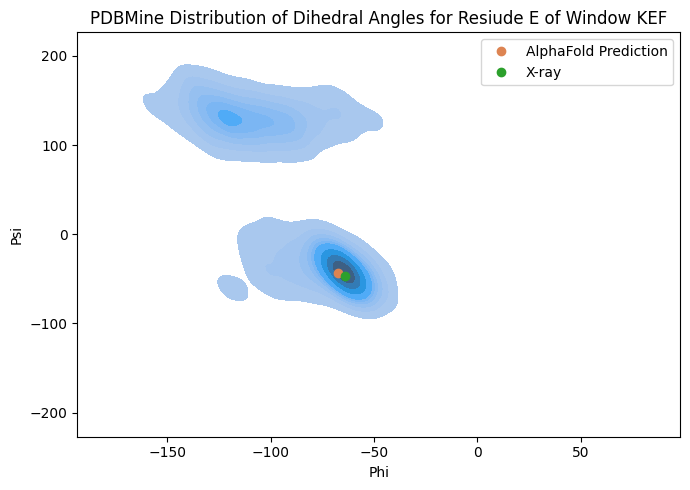

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(7,5))

seq = overlapping_seqs[5]
print(seq)
phi_psi_dist = phi_psi_mined[phi_psi_mined.seq == seq]
phi_psi_alpha = phi_psi_predictions[(phi_psi_predictions.protein_id == alphafold_id) & (phi_psi_predictions.seq == seq)]
xray_phi_psi_seq = xray_phi_psi[xray_phi_psi.seq == seq]

sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', ax=ax, fill=True)
ax.plot(phi_psi_alpha.phi, phi_psi_alpha.psi, 'o', color='#dd8452', label='AlphaFold Prediction')
ax.plot(xray_phi_psi_seq.phi, xray_phi_psi_seq.psi, 'o', color='tab:green', label='X-ray')
ax.legend()
ax.set_title(f'PDBMine Distribution of Dihedral Angles for Resiude E of Window KEF')
ax.set_xlabel('Phi')
ax.set_ylabel('Psi')
# ax.set_xlim(-180, -10)
# ax.set_ylim(-100, 200)

plt.tight_layout()

# Mahalanobis

/tmp/ipykernel_823922/386381001.py:38: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', hue='cluster', palette='viridis', ax=ax, fill=True, legend=False)
/tmp/ipykernel_823922/386381001.py:38: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', hue='cluster', palette='viridis', ax=ax, fill=True, legend=False)


xray: 0.2823342063612245
alpha: 0.06066295225487976
preds:                 0
count  537.000000
mean     8.599694
std     39.961717
min      0.002449
25%      0.143744
50%      0.251829
75%      0.543061
max    336.711878


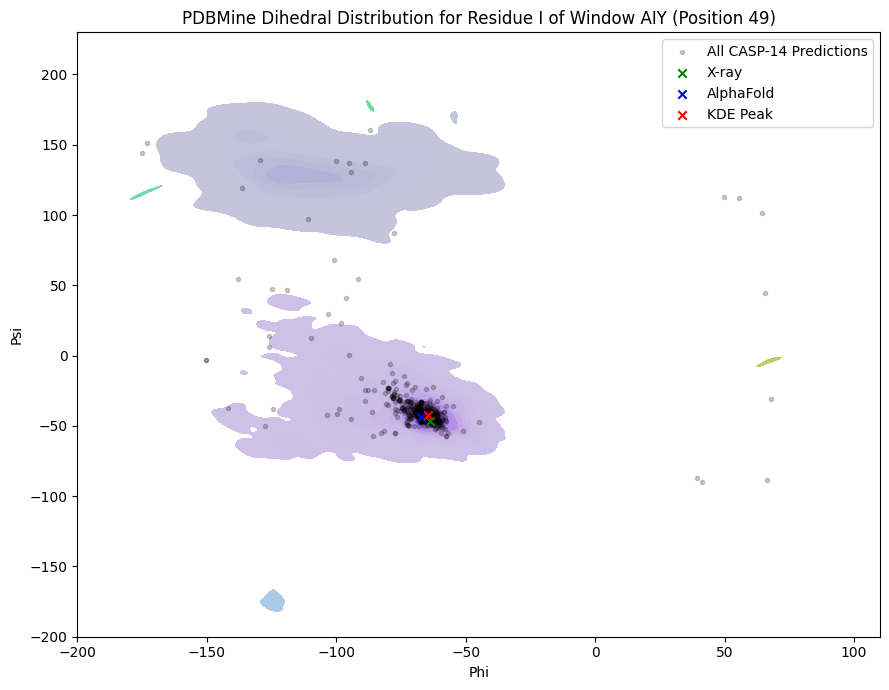

In [106]:
# For one window
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


seq = overlapping_seqs[5]
phi_psi_dist = phi_psi_mined.loc[phi_psi_mined.seq == seq][['phi','psi']]

# Find clusters
clustering = DBSCAN(eps=7, min_samples=3).fit(phi_psi_dist.values)
phi_psi_dist['cluster'] = clustering.labels_

# Find most probable data point and the cluster it belongs to
kernel = gaussian_kde(phi_psi_dist[['phi','psi']].T)
phi_psi_most_likely_idx = kernel(phi_psi_dist[['phi','psi']].T).argmax()
phi_psi_c = phi_psi_dist.loc[phi_psi_dist.cluster == phi_psi_dist.iloc[phi_psi_most_likely_idx].cluster, ['phi','psi']].values

# Mahalanobis distance to most common cluster
cov = np.cov(phi_psi_c.T)
icov = np.linalg.inv(cov)

# xray
xray = xray_phi_psi[xray_phi_psi.seq == seq][['phi','psi']].values
pos = xray_phi_psi[xray_phi_psi.seq == seq]['pos'].values[0]
md_xray = (xray - phi_psi_c.mean(axis=0)) @ icov @ (xray - phi_psi_c.mean(axis=0)).T

# alphafold to most common cluster
alpha = phi_psi_predictions[(phi_psi_predictions.protein_id == alphafold_id) & (phi_psi_predictions.seq == seq)][['phi','psi']].values
md_alpha = (alpha - phi_psi_c.mean(axis=0)) @ icov @ (alpha - phi_psi_c.mean(axis=0)).T

# Other predictions
preds = phi_psi_predictions[phi_psi_predictions.seq == seq][['phi','psi']].values
icov = np.repeat(np.expand_dims(icov, 0), preds.shape[0], axis=0) # expand for batch matrix multiplication
md_preds = md = (np.expand_dims((preds - phi_psi_c.mean(axis=0)), 1) @ icov @ np.expand_dims((preds - phi_psi_c.mean(axis=0)), 2)).squeeze()

fig, ax = plt.subplots(figsize=(9,7))
sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', hue='cluster', palette='viridis', ax=ax, fill=True, legend=False)
ax.scatter(preds[:,0], preds[:,1], color='black', marker='.', alpha=0.2, label='All CASP-14 Predictions')
ax.scatter(xray[0,0], xray[0,1], color='green', marker='x', label='X-ray')
ax.scatter(alpha[0,0], alpha[0,1], color='blue', marker='x', label='AlphaFold')
ax.scatter(phi_psi_dist.iloc[phi_psi_most_likely_idx].phi, phi_psi_dist.iloc[phi_psi_most_likely_idx].psi, color='red', marker='x', label='KDE Peak')
ax.set_xlim(-200, 110)
ax.set_ylim(-200, 230)
ax.set_xlabel('Phi')
ax.set_ylabel('Psi')
ax.set_title(f'PDBMine Dihedral Distribution for Residue {seq[-WINDOW_SIZE//2]} of Window {seq} (Position {pos})')
ax.legend()
plt.tight_layout()

# Zoomed in
# fig, ax = plt.subplots(figsize=(7,5))
# sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', hue='cluster', palette='viridis', ax=ax, fill=True, legend=False)
# ax.scatter(preds[:,0], preds[:,1], color='black', marker='.', alpha=0.2, label='All CASP-14 Predictions')
# ax.scatter(xray[0,0], xray[0,1], color='green', marker='x', s=100, label='X-ray')
# ax.scatter(alpha[0,0], alpha[0,1], color='blue', marker='x', s=100, label='AlphaFold')
# ax.scatter(phi_psi_dist.iloc[phi_psi_most_likely_idx].phi, phi_psi_dist.iloc[phi_psi_most_likely_idx].psi, color='red', marker='x', s=100, label='KDE Peak')
# ax.set_xlim(-90, -40)
# ax.set_ylim(-80, 0)
# ax.axis('off')
# plt.tight_layout()

print('xray:', md_xray[0,0])
print('alpha:', md_alpha[0,0])
print('preds:', pd.DataFrame(md_preds).describe())

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

mds = []
phi_psi_predictions['md'] = np.nan
xray_phi_psi['md'] = np.nan
for i,seq in tqdm(enumerate(phi_psi_mined.seq.unique())):
    phi_psi_dist = phi_psi_mined.loc[phi_psi_mined.seq == seq][['phi','psi']]
    xray = xray_phi_psi[xray_phi_psi.seq == seq][['phi','psi']].values
    preds = phi_psi_predictions.loc[phi_psi_predictions.seq == seq][['phi','psi']].values

    if phi_psi_dist.shape[0] < 2 or xray.shape[0] < 1 or preds.shape[0] < 1:
        print(f'Skipping {seq} - not enough data points')
        xray_phi_psi.loc[xray_phi_psi.seq == seq, 'md'] = np.nan
        phi_psi_predictions.loc[phi_psi_predictions.seq == seq, 'md'] = np.nan        
        continue
    # Find clusters
    clustering = DBSCAN(eps=10, min_samples=3).fit(phi_psi_dist.values)
    phi_psi_dist['cluster'] = clustering.labels_

    # Find most probable data point and the cluster it belongs to
    kernel = gaussian_kde(phi_psi_dist[['phi','psi']].T)
    phi_psi_most_likely_idx = kernel(phi_psi_dist[['phi','psi']].T).argmax()
    phi_psi_c = phi_psi_dist.loc[phi_psi_dist.cluster == phi_psi_dist.iloc[phi_psi_most_likely_idx].cluster, ['phi','psi']].values

    # Mahalanobis distance to most common cluster
    cov = np.cov(phi_psi_c.T)
    if np.linalg.det(cov) == 0:
        print(f'Skipping {seq} - singular matrix')
        xray_phi_psi.loc[xray_phi_psi.seq == seq, 'md'] = np.nan
        phi_psi_predictions.loc[phi_psi_predictions.seq == seq, 'md'] = np.nan
        continue
    icov = np.linalg.inv(cov)

    # xray
    md_xray = (xray - phi_psi_c.mean(axis=0)) @ icov @ (xray - phi_psi_c.mean(axis=0)).T
    if np.any(md_xray < 0):
        md_xray = np.nan
    else:
        md_xray = np.sqrt(md_xray)[0,0]
    print(md_xray)
    xray_phi_psi.loc[xray_phi_psi.seq == seq, 'md'] = md_xray

    # All predictions
    mean = phi_psi_dist[['phi','psi']].mean(axis=0).values
    md = (np.expand_dims((preds - mean), 1) @ icov @ np.expand_dims((preds - mean), 2)).squeeze()
    if np.any(md < 0):
        md = np.nan
    else:
        md = np.sqrt(md)
    phi_psi_predictions.loc[phi_psi_predictions.seq == seq, 'md'] = md

phi_psi_predictions.to_csv('phi_psi_predictions_md.csv', index=False)
xray_phi_psi.to_csv('xray_phi_psi_md.csv', index=False)

In [ ]:
phi_psi_predictions = pd.read_csv('phi_psi_predictions_md.csv')
xray_phi_psi = pd.read_csv('xray_phi_psi_md.csv')

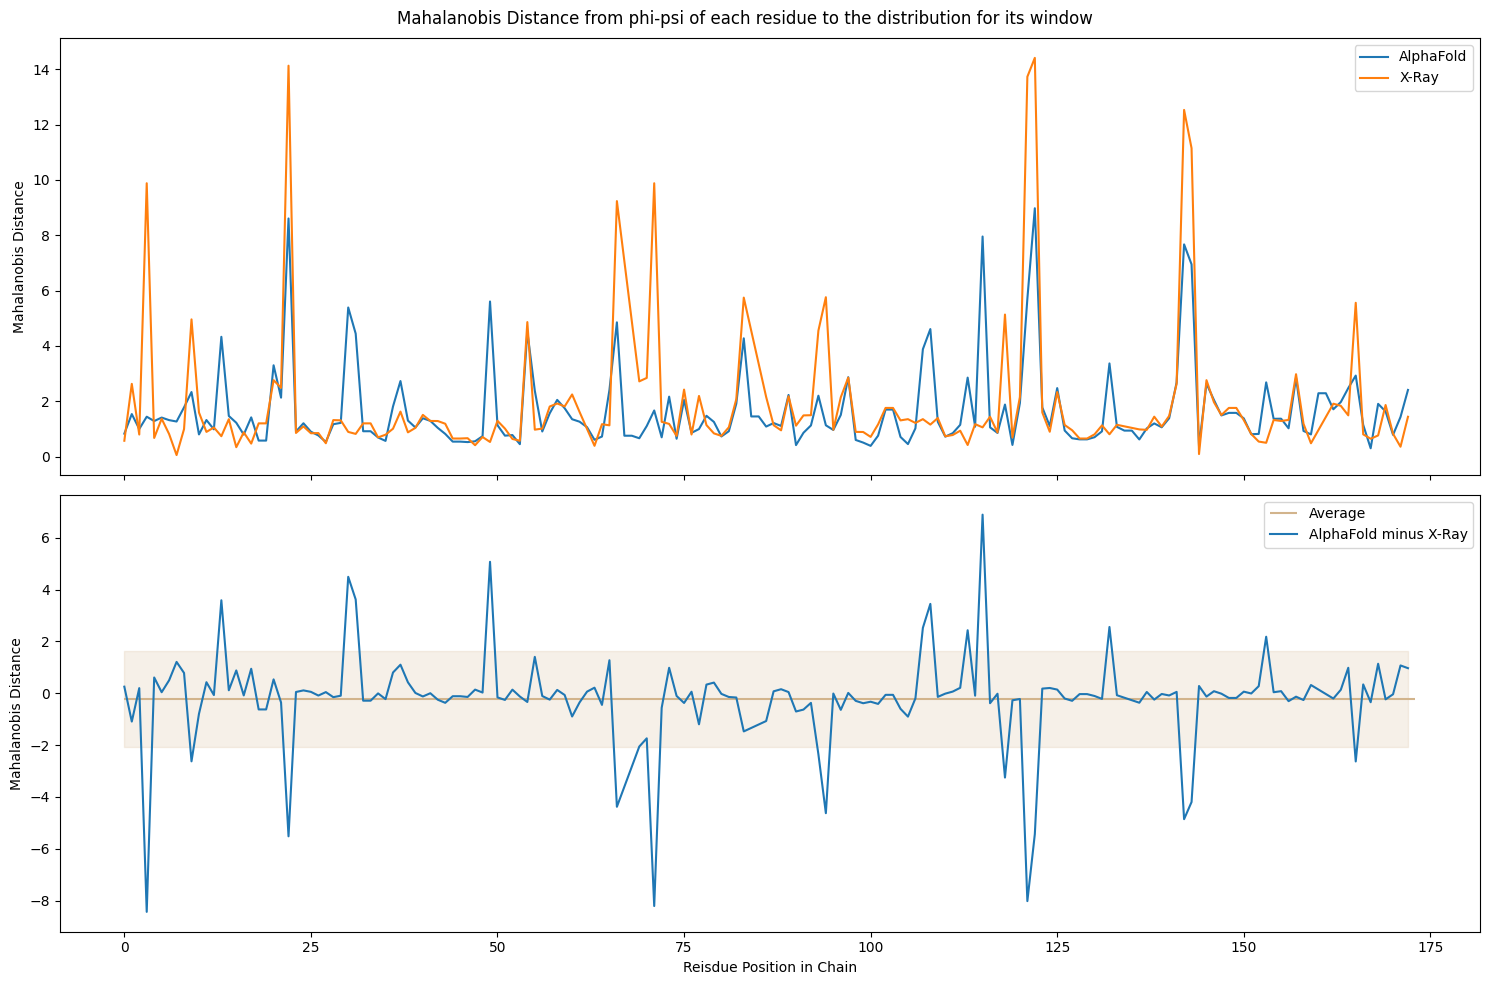

In [114]:
# Plot xray vs prediction md for each residue of one prediction
phi_psi_predictions['Source'] = 'CASP Prediction'
phi_psi_predictions.loc[phi_psi_predictions.protein_id == alphafold_id, 'Source'] = 'AlphaFold'
alpha = phi_psi_predictions.loc[phi_psi_predictions.protein_id == alphafold_id]
xray_phi_psi['Source'] = 'X-Ray'
both = pd.merge(alpha, xray_phi_psi, how='inner', on=['seq','seq'], suffixes=('_alpha','_xray'))
both['md_diff'] = both['md_alpha'] - both['md_xray']
fig, axes = plt.subplots(2, figsize=(15,10), sharex=True)
sns.lineplot(data=both.reset_index(), x='index', y='md_alpha', ax=axes[0], label='AlphaFold')
sns.lineplot(data=both.reset_index(), x='index', y='md_xray', ax=axes[0], label='X-Ray')
axes[0].set_ylabel('Mahalanobis Distance')
axes[1].hlines(both['md_diff'].mean(), xmin=0, xmax=len(both), color='tan', label='Average')
axes[1].fill_between(x=both.index, y1=both['md_diff'].mean() + both['md_diff'].std(), y2=both['md_diff'].mean() - both['md_diff'].std(), color='tan', alpha=0.2)
sns.lineplot(data=both.reset_index(), x='index', y='md_diff', ax=axes[1], label='AlphaFold minus X-Ray')
axes[1].set_ylabel('Mahalanobis Distance')
axes[1].set_xlabel('Reisdue Position in Chain')
fig.suptitle('Mahalanobis Distance from phi-psi of each residue to the distribution for its window')
plt.tight_layout()

# NOTE: for presentation, highlight area around res-300 to show this is where alphafold did bad

In [122]:
results['Model']

0      T1032TS427_2-D1
1      T1032TS427_1-D1
2      T1032TS427_5-D1
3      T1032TS427_4-D1
4      T1032TS427_3-D1
            ...       
576    T1032TS242_4-D1
577    T1032TS170_4-D1
578    T1032TS373_2-D1
579    T1032TS373_1-D1
580    T1032TS099_5-D1
Name: Model, Length: 581, dtype: object

In [125]:
group_maha.protein_id

0      T1032TS003_1
1      T1032TS005_1
2      T1032TS005_2
3      T1032TS005_3
4      T1032TS005_4
           ...     
549    T1032TS498_1
550    T1032TS498_2
551    T1032TS498_3
552    T1032TS498_4
553    T1032TS498_5
Name: protein_id, Length: 554, dtype: object

R-squared: 0.180797


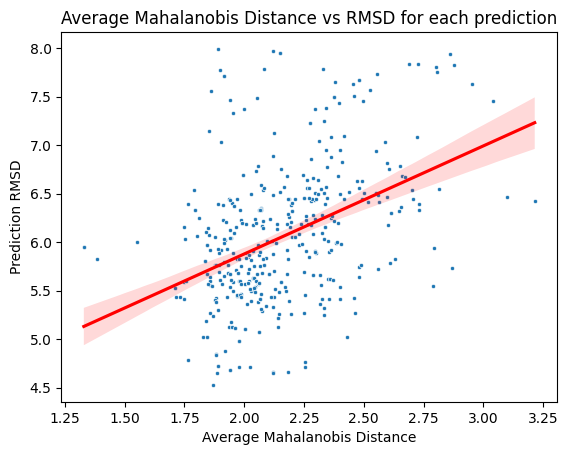

In [141]:
# Compare rmsd and mahalanobis distance
import matplotlib.pyplot as plt
from scipy.stats import linregress
results['Model'] = results['Model'].apply(lambda x: x.split('-')[0])
group_maha = phi_psi_predictions.groupby(['protein_id'], as_index=False).mean(numeric_only=True)#.sort_values('mahalanobis_dist').set_index('protein_id').dropna()
group_maha = group_maha.merge(results[['Model', 'RMS_CA']], left_on='protein_id', right_on='Model', how='inner')
group_maha = group_maha[group_maha.RMS_CA < 8].dropna()
fig, ax = plt.subplots()
sns.scatterplot(data=group_maha, x='md', y='RMS_CA', ax=ax, marker='.', legend=False)
sns.regplot(data=group_maha, x='md', y='RMS_CA', ax=ax, scatter=False, color='red')
ax.set_xlabel('Average Mahalanobis Distance')
ax.set_ylabel('Prediction RMSD')
ax.set_title('Average Mahalanobis Distance vs RMSD for each prediction')
regr = linregress(group_maha.md, group_maha.RMS_CA)
print(f"R-squared: {regr.rvalue**2:.6f}")
# ax.set_xlim((0.8,1.4))
# ax.set_ylim((0,6))

(40490, 7)
(25922, 7)
(29711, 7)
(14531, 7)


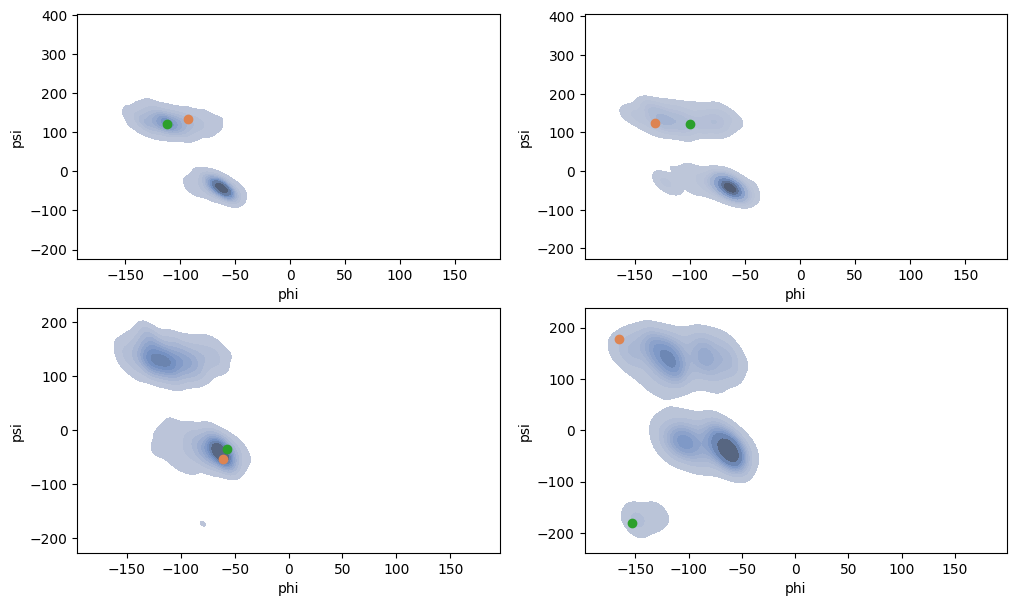

In [143]:
# plot dists with highest mahalanobis distance for alphafold
phi_psi_alpha = phi_psi_predictions[phi_psi_predictions.protein_id == alphafold_id]
seqs_with_highest_maha = phi_psi_alpha.sort_values('md', ascending=False).head(16).seq.values
m = 0
fig, axes = plt.subplots(2,2,figsize=(12,7))
for i,seq in enumerate(seqs_with_highest_maha[m:m+4]):
    xray_phi_psi_seq = xray_phi_psi[xray_phi_psi.seq == seq]
    phi_psi_dist = phi_psi_mined[phi_psi_mined.seq == seq]
    print(phi_psi_dist.shape)
    phi_psi_alpha_seq = phi_psi_alpha[phi_psi_alpha.seq == seq]
    ax = axes.flatten()[i]
    sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', ax=ax, fill=True, color='#7490c0', legend=True)
    ax.plot(phi_psi_alpha_seq.phi, phi_psi_alpha_seq.psi, 'o', color='#dd8452', label='Prediction')
    ax.plot(xray_phi_psi_seq.phi, xray_phi_psi_seq.psi, 'o', color='tab:green', label='X-ray')